<a href="https://colab.research.google.com/github/Krutika-bhandekar/Covid-Sentiment-Analysis/blob/main/Coronavirus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**
**Coronavirus Tweets Sentiment Analysis-Classification**

##### **Project Type**    - EDA/Regression/Classification/Unsupervised
##### **Contribution**    - Individual
##### **Krutika Bhandekar**

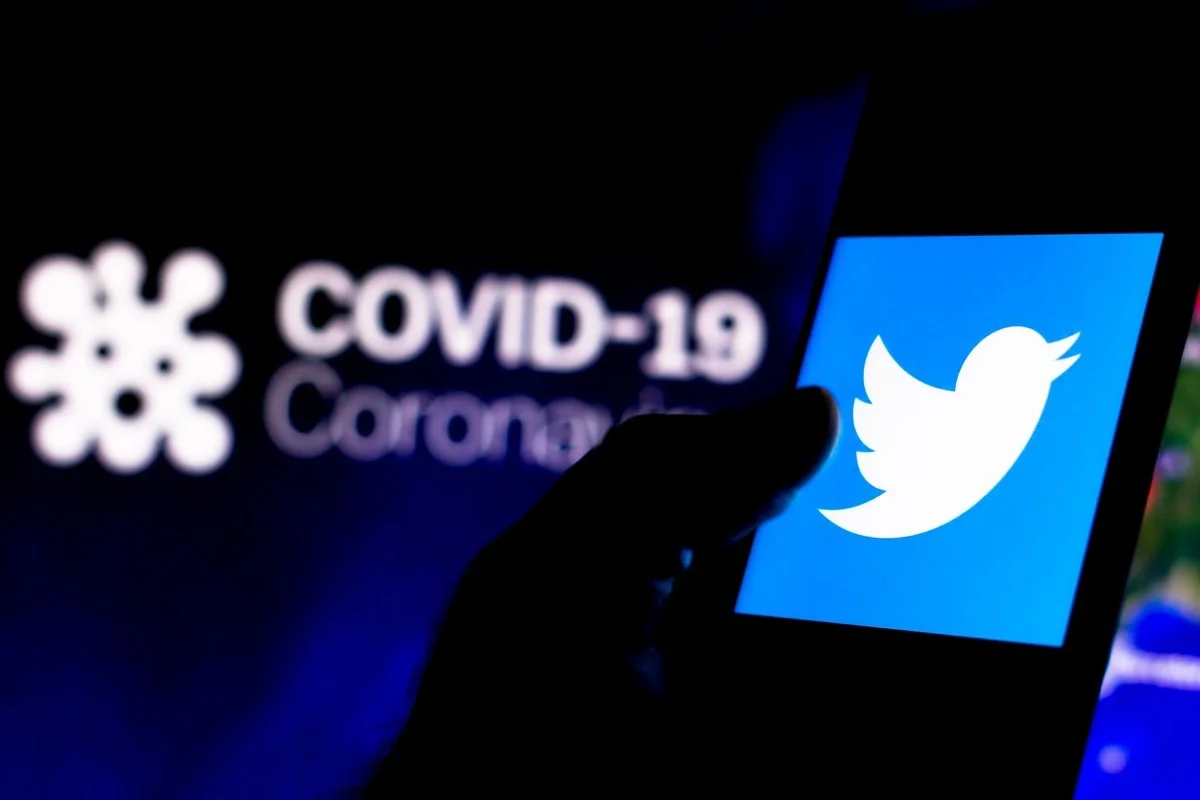

# **Project Summary -**

The CoVid-19 pandemic has shaken the very foundation of society wherein people were forced to live inside their houses because of the lockdown being imposed and also the livelihood of almost every section of the society was impacted.

The objective of our analysis revolved around knowing the sentiments of people from their tweets on Twitter as Twitter is one of the prime means of expression over social media.

**APPROACH:**

Text Preprocessing

Exploratory Data Analysis

Feature Engineering & Pre-Preprocessing

Model Training

**ALGORITHMS USED**:

Logistic Regression with Grid Search CV

Decision Tree Classifier(Count Vector and TF ID Vectorization techniques).

KNN(Count Vector and TF ID Vectorization techniques).

SVM Classifier (Count Vector and TF ID Vectorization techniques).

Multinomial Navies Bayes & Bernoulli Navies Bayes(Count Vector and TF ID Vectorization techniques).

Random Forest(Count Vector and TF ID Vectorization techniques).

Stochastic Gradient Descent(Count Vector and TF ID Vectorization techniques).

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Write Problem Statement Here.**

This challenge asks you to build a classification model to predict the sentiment of COVID-19 tweets. The tweets have been pulled from Twitter and manual tagging has been done then.The names and usernames have been given codes to avoid any privacy concerns.
We are given the following information:
1. Location
2. TweetAt
3. Original Tweet
4. Sentiment
5. User Name
6. Screen Name

# **General Guidelines** : -
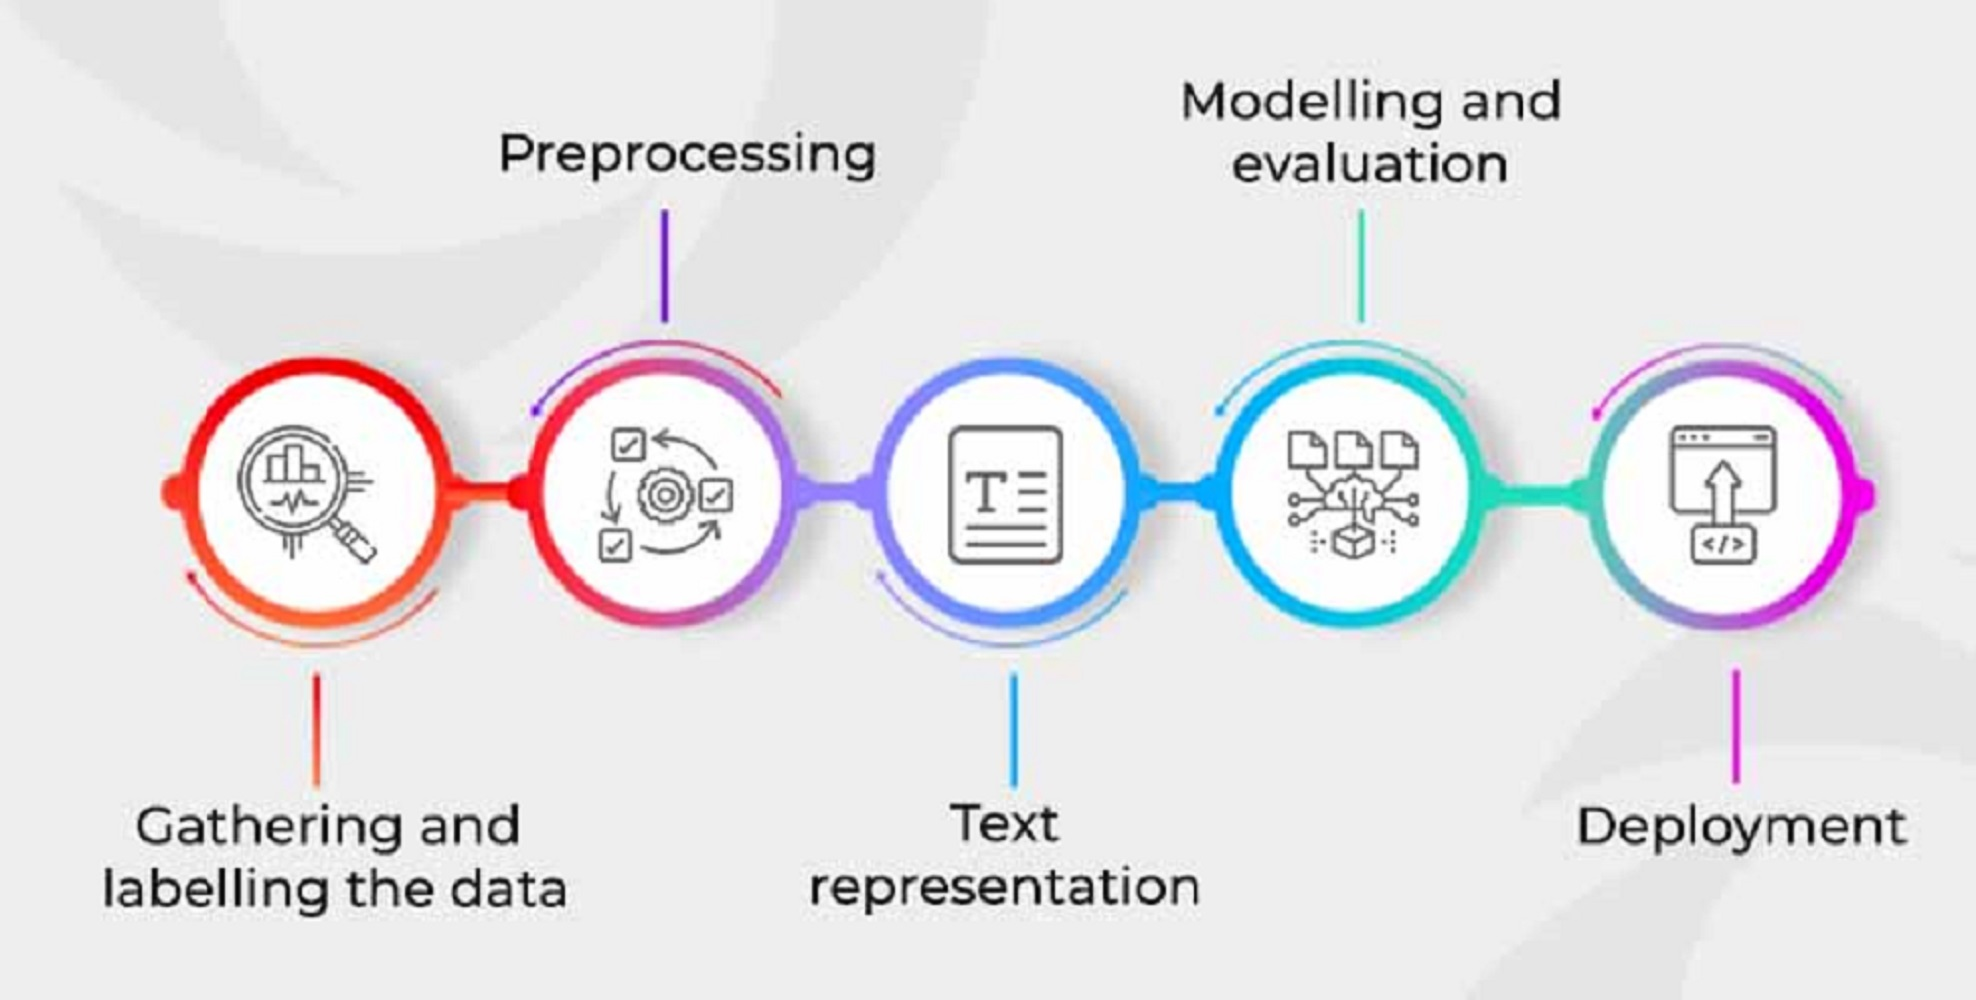

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
from wordcloud import WordCloud
import nltk
nltk.download('all',quiet=True)
from PIL import Image

#Model libraries
from sklearn.metrics import *
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path = '/content/drive/MyDrive/csv_files/Coronavirus Tweets.csv'

In [4]:
tweet = pd.read_csv(path, encoding='ISO-8859-1')

### Dataset First View

In [5]:
# Dataset First Look
tweet.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


### Dataset Rows & Columns count

In [6]:
# Dataset Rows & Columns count
tweet.shape

(41157, 6)

In [7]:
tweet.columns

Index(['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet',
       'Sentiment'],
      dtype='object')

In [8]:
tweet.index

RangeIndex(start=0, stop=41157, step=1)

### Dataset Information

In [9]:
# Dataset Info
tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


#### Duplicate Values

In [10]:
# Dataset Duplicate Value Count
tweet.duplicated().sum()

0

#### Missing Values/Null Values

In [11]:
# Missing Values/Null Values Count
tweet.isna().sum()

UserName            0
ScreenName          0
Location         8590
TweetAt             0
OriginalTweet       0
Sentiment           0
dtype: int64

In [12]:
# Visualizing the missing values
tweet.isnull().sum().sort_values(ascending=False)

Location         8590
UserName            0
ScreenName          0
TweetAt             0
OriginalTweet       0
Sentiment           0
dtype: int64

**What did you know about your dataset?**

**Answer Here**

In this  Dataset  their are  6 column  having 'Location', 'UserName', 'ScreenName', 'TweetAt', 'OriginalTweet','Sentiment' and 'Location' column have duplicated value i.e 8590 which can take action later on as proceed on our Classfication Machine Learning Project.

## ***2. Understanding Your Variables***

In [13]:
# Dataset Columns
tweet.columns


Index(['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet',
       'Sentiment'],
      dtype='object')

In [14]:
# Dataset Describe
tweet.describe(include='all')

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
count,41157.000000,41157.000000,32567,41157,41157,41157
unique,NaN,NaN,12220,30,41157,5
top,NaN,NaN,London,20-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Positive
freq,NaN,NaN,540,3448,1,11422
mean,24377.000000,69329.000000,NaN,NaN,NaN,NaN
std,11881.146851,11881.146851,NaN,NaN,NaN,NaN
min,3799.000000,48751.000000,NaN,NaN,NaN,NaN
25%,14088.000000,59040.000000,NaN,NaN,NaN,NaN
50%,24377.000000,69329.000000,NaN,NaN,NaN,NaN
75%,34666.000000,79618.000000,NaN,NaN,NaN,NaN


### **Variables Description**

**Answer Here**

**UserName**: This column contains the username of the person who posted the tweet.

**ScreenName**: This column contains the screen name or handle of the user who posted the tweet.

**Location**: This column contains the location of the user who posted the tweet. This could be their city, state, country, or any other geographic location that they have specified in their Twitter profile.

**TweetAt**: This column contains the date and time when the tweet was posted.

**OriginalTweet**: This column contains the actual text of the tweet that was posted.

**Sentiment**: This column contains the sentiment label assigned to the tweet. This label could be positive, negative,extremely positive,extremely negative neutral, depending on the sentiment analysis algorithm used to classify the tweet.

### Check Unique Values for each variable.


In [15]:
# Check Unique Values for each variable.
print(tweet.apply(lambda col: col.unique())) 

UserName         [3799, 3800, 3801, 3802, 3803, 3804, 3805, 380...
ScreenName       [48751, 48752, 48753, 48754, 48755, 48756, 487...
Location         [London, UK, Vagabonds, nan, ÃT: 36.319708,-8...
TweetAt          [16-03-2020, 17-03-2020, 18-03-2020, 19-03-202...
OriginalTweet    [@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/...
Sentiment        [Neutral, Positive, Extremely Negative, Negati...
dtype: object


In [16]:
tweet.Sentiment.unique()

array(['Neutral', 'Positive', 'Extremely Negative', 'Negative',
       'Extremely Positive'], dtype=object)

In [17]:
tweet.Location.unique()

array(['London', 'UK', 'Vagabonds', ..., 'Juba south sudan', 'OHIO',
       'i love you so much || he/him'], dtype=object)

## ***3. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [18]:
# Chart - 1 visualization code
# Count the number of occurrences of each sentiment value in the 'Sentiment' column of the 'tweet' DataFrame and reset the index
sentiment_count = tweet['Sentiment'].value_counts().reset_index()
# Rename the columns of the resulting DataFrame to 'Sentiment' and 'count', respectively
sentiment_count.columns = ['Sentiment','count']
sentiment_count

,Sentiment,count
0,Positive,11422
1,Negative,9917
2,Neutral,7713
3,Extremely Positive,6624
4,Extremely Negative,5481


Text(0, 0.5, 'count')

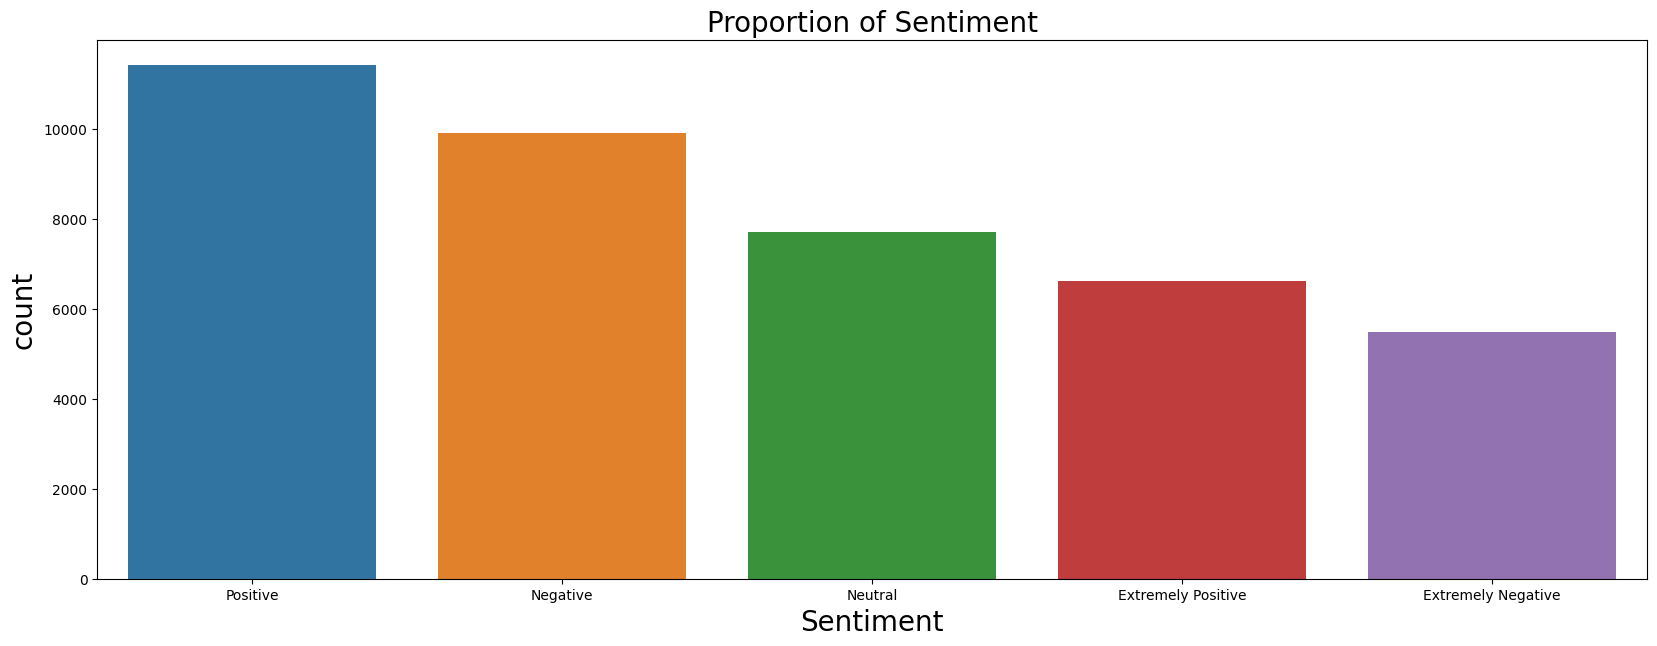

In [19]:
plt.figure(figsize=(20,7))
ax = sns.barplot(x="Sentiment", y='count', data=sentiment_count)
ax.set_title("Proportion of Sentiment", fontsize=20)
ax.set_xlabel("Sentiment", fontsize=20)
ax.set_ylabel('count', fontsize=20)

In [20]:
# replacing values
replace_values = {"Sentiment":{'Extremely Negative':'Negative', 'Extremely Positive':'Positive'}}
tweet = tweet.replace(replace_values)

In [21]:
sentiment_count1 = tweet['Sentiment'].value_counts().reset_index()
sentiment_count1.columns = ['Sentiment','count']
sentiment_count1

,Sentiment,count
0,Positive,18046
1,Negative,15398
2,Neutral,7713


**1. Why did you pick the specific chart?**

**Answer Here.**

A bar chart can effectively show the count of tweets for each sentiment category in a clear and concise way. Each sentiment category can be represented by a bar, with the height of the bar indicating the count of tweets for that sentiment category.

**2. What is/are the insight(s) found from the chart?**

**Answer Here**

Positive Sentiment is high as compared to the Negative, Neutral Sentiment.

#### Chart - 2

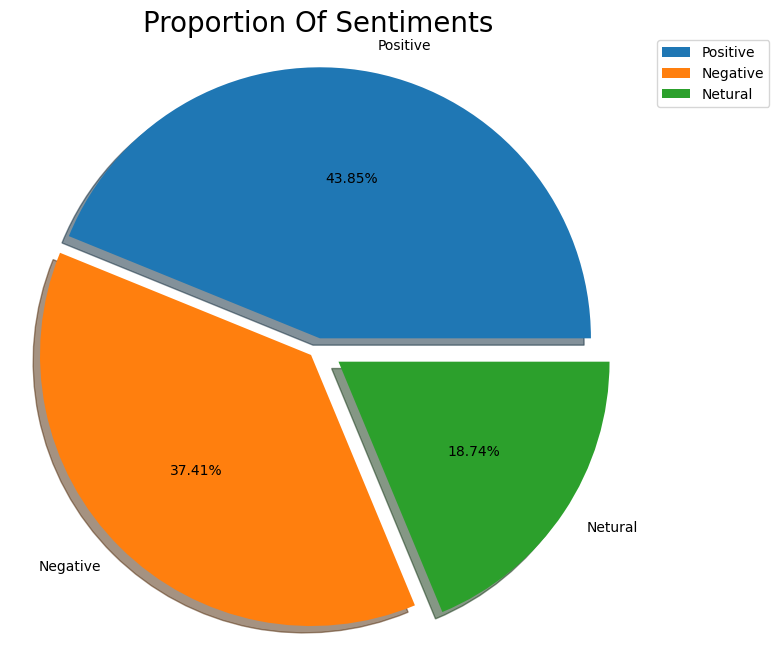

In [22]:
# Chart - 2 visualization code
# Plotting the piechart for Sentiments distribution
sentiment_count1 = tweet['Sentiment'].value_counts().to_list()
labels=['Positive','Negative','Netural']
plt.figure(figsize=(10,8))
plt.pie(x=sentiment_count1,explode=[0.04,0.04,0.1],shadow= True,labels=labels,autopct="%.2f%%",radius=1.1)
plt.title("Proportion Of Sentiments", fontsize=20)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()

**1. Why did you pick the specific chart?**

**Answer Here.**

Pie charts are useful when you want to show the relative sizes of different categories, and they allow for quick and easy comparison between the categories.In this case, the whole data is the set of tweets, and the parts are the different sentiment categories (positive, negative, and neutral).

##### **2. What is/are the insight(s) found from the chart?**

**Answer Here**

Positive Sentiment is in High Proportion as **43.85%** as compared to negative and netural i.e   **18.74%** and **37.41%.**

#### Chart - 3

In [23]:
# Chart - 3 visualization code
#Top 10 most frequently occurring locations from the 'Location' column of the tweet DataFrame.
Top_Location_Of_tweet= tweet['Location'].value_counts().head(10)
sns.set(rc={'figure.figsize':(12,8)})
sns.set_style('white')


In [24]:
Top_Location_Of_tweet=pd.DataFrame(Top_Location_Of_tweet)
Top_Location_Of_tweet.reset_index(inplace=True)
Top_Location_Of_tweet.rename(columns={'index':'Location', 'Location':'Location_Count'}, inplace=True)
Top_Location_Of_tweet

,Location,Location_Count
0,London,540
1,United States,528
2,"London, England",520
3,"New York, NY",395
4,"Washington, DC",373
5,United Kingdom,337
6,"Los Angeles, CA",281
7,India,268
8,UK,232
9,Australia,225


[Text(0, 0, 'London'),
 Text(1, 0, 'United States'),
 Text(2, 0, 'London, England'),
 Text(3, 0, 'New York, NY'),
 Text(4, 0, 'Washington, DC'),
 Text(5, 0, 'United Kingdom'),
 Text(6, 0, 'Los Angeles, CA'),
 Text(7, 0, 'India'),
 Text(8, 0, 'UK'),
 Text(9, 0, 'Australia')]

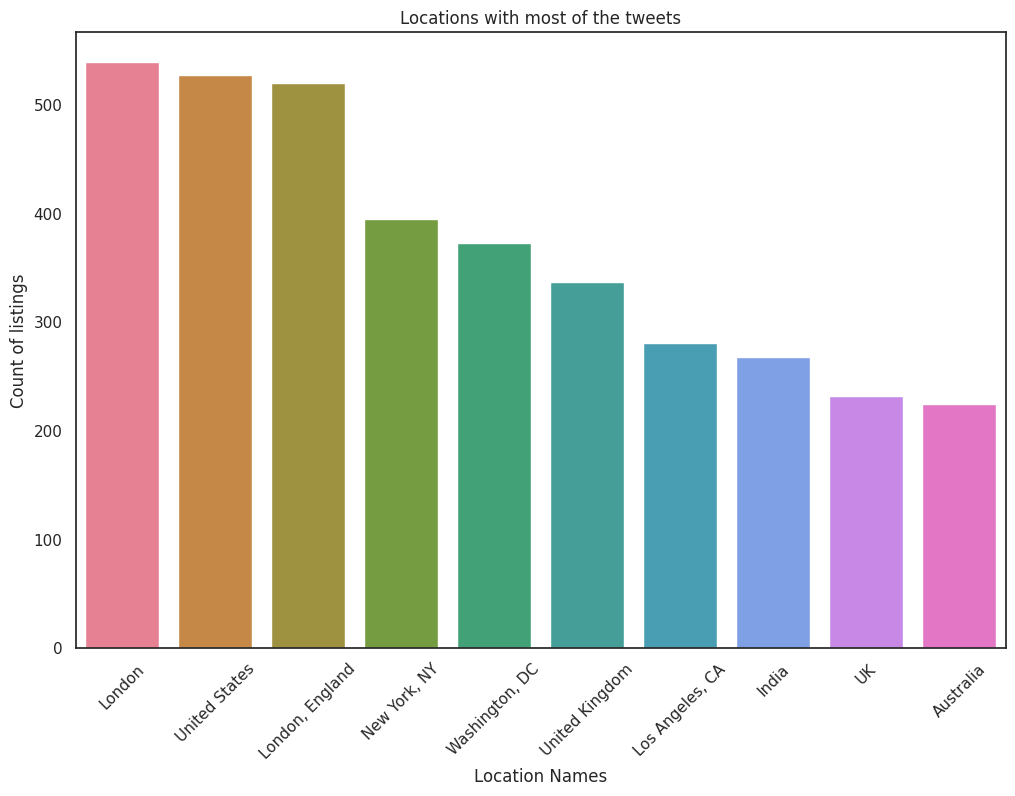

In [25]:
# create a bar plot using Seaborn library
viz_1=sns.barplot(x="Location", y="Location_Count", data=Top_Location_Of_tweet,
                 palette="husl")
# Set plot title, y-axis label, and x-axis label
viz_1.set_title('Locations with most of the tweets')
viz_1.set_ylabel('Count of listings')
viz_1.set_xlabel('Location Names')
# Rotate x-axis labels by 45 degrees to make them easier to read
viz_1.set_xticklabels(viz_1.get_xticklabels(), rotation=45)

**1. Why did you pick the specific chart?**

**Answer Here.**

To visualize this data, a bar chart is a good choice. A bar chart can effectively show the count of tweets from each location in a clear and concise way. Each location can be represented by a bar, with the height of the bar indicating the count of tweets from that location.

 **2. What is/are the insight(s) found from the chart?**

**Answer Here**

City **London** has Highest tweet comapred to other city tweet.

#### Chart - 4

In [26]:
# Chart - 4 visualization code
#calculates the length (number of characters) of each tweet and stores the result in the text_length column.
tweet['text_length'] = tweet['OriginalTweet'].apply(len)

In [27]:
tweet_character_length=tweet['text_length'].sort_values(ascending=False)

In [28]:
# Create a DataFrame `top_tweet_character_length` from `tweet_character_length
top_tweet_character_length=pd.DataFrame(tweet_character_length)
# Reset the index of `top_tweet_character_length` and assign the result back to `top_tweet_character_length`
top_tweet_character_length.reset_index(inplace=True)
# Rename the columns of `top_tweet_character_length` to 'Original_Tweet_Row' and 'tweet_character_Count'
top_tweet_character_length.rename(columns={'index':'Original_Tweet_Row', 'text_length':'tweet_character_Count'}, inplace=True)

In [29]:
top_tweet_character_length

,Original_Tweet_Row,tweet_character_Count
0,25160,355
1,7483,350
2,29688,341
3,17811,340
4,27346,338
...,...,...
41152,15577,12
41153,16872,11
41154,35526,11
41155,20467,11


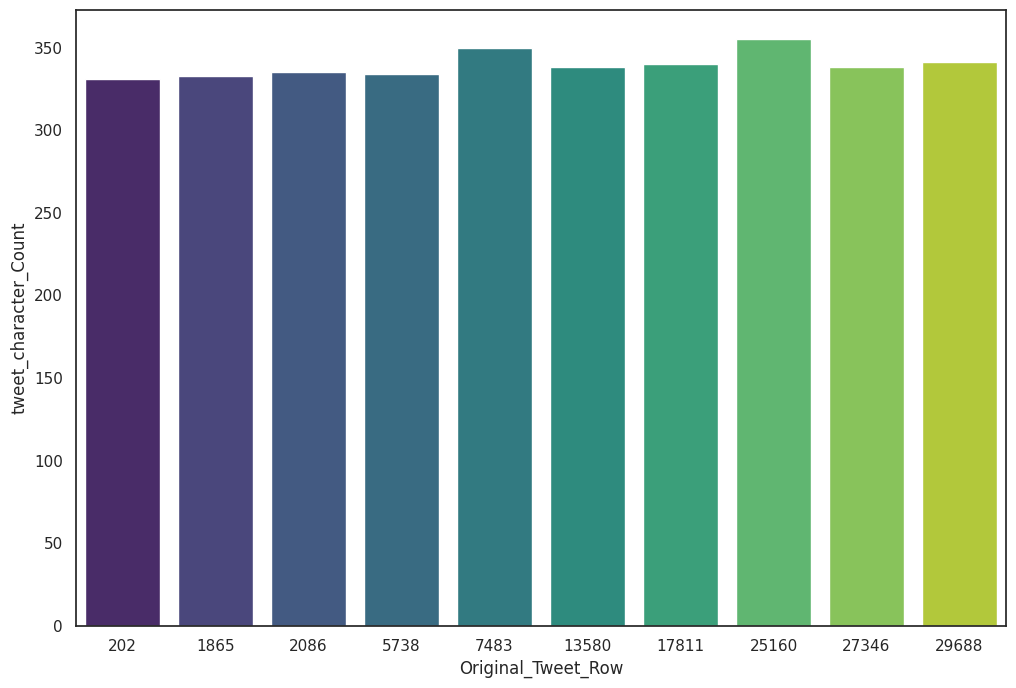

In [30]:
# Select the top 10 tweets with the longest character lengths, sort them in descending order, and assign them to `top_tweet_length`
top_tweet_length=top_tweet_character_length.head(10).sort_values(by='tweet_character_Count',ascending=False)
plt.figure(figsize=(12, 8))
# Create a bar plot using Seaborn, with 'Original_Tweet_Row' on the x-axis, 'tweet_character_Count' on the y-axis, and `top_tweet_length` as the data source
bar_plot = sns.barplot(x="Original_Tweet_Row", y="tweet_character_Count", data=top_tweet_length, palette='viridis')

**1. Why did you pick the specific chart?**

**Answer Here.**

To visualize this data, a bar chart is a good choice. A bar chart can effectively show the Original_Tweet_Row from each location in a clear and concise way. Each location can be represented by a bar, with the height of the bar indicating the tweet_character_Count.

**2. What is/are the insight(s) found from the chart?**


**Answer Here**

Row Number 25160 has highest Tweet length of character i.e 350 

#### Chart - 5

In [31]:
# Count the number of tweets for each unique date in the 'TweetAt' column of `tweet` and display the 15 most frequent dates
tweet['TweetAt'].value_counts()

20-03-2020    3448
19-03-2020    3215
25-03-2020    2979
18-03-2020    2742
21-03-2020    2653
22-03-2020    2114
23-03-2020    2062
17-03-2020    1977
08-04-2020    1881
07-04-2020    1843
06-04-2020    1742
24-03-2020    1480
09-04-2020    1471
13-04-2020    1428
26-03-2020    1277
05-04-2020    1131
10-04-2020    1005
02-04-2020     954
11-04-2020     909
03-04-2020     810
12-04-2020     803
04-04-2020     767
16-03-2020     656
01-04-2020     630
27-03-2020     345
31-03-2020     316
14-04-2020     284
29-03-2020     125
30-03-2020      87
28-03-2020      23
Name: TweetAt, dtype: int64

In [32]:
# Count the number of tweets for each unique date in the 'TweetAt' column of `tweet` and display the 15 most frequent dates
tweet['TweetAt'].value_counts().head(15)

20-03-2020    3448
19-03-2020    3215
25-03-2020    2979
18-03-2020    2742
21-03-2020    2653
22-03-2020    2114
23-03-2020    2062
17-03-2020    1977
08-04-2020    1881
07-04-2020    1843
06-04-2020    1742
24-03-2020    1480
09-04-2020    1471
13-04-2020    1428
26-03-2020    1277
Name: TweetAt, dtype: int64

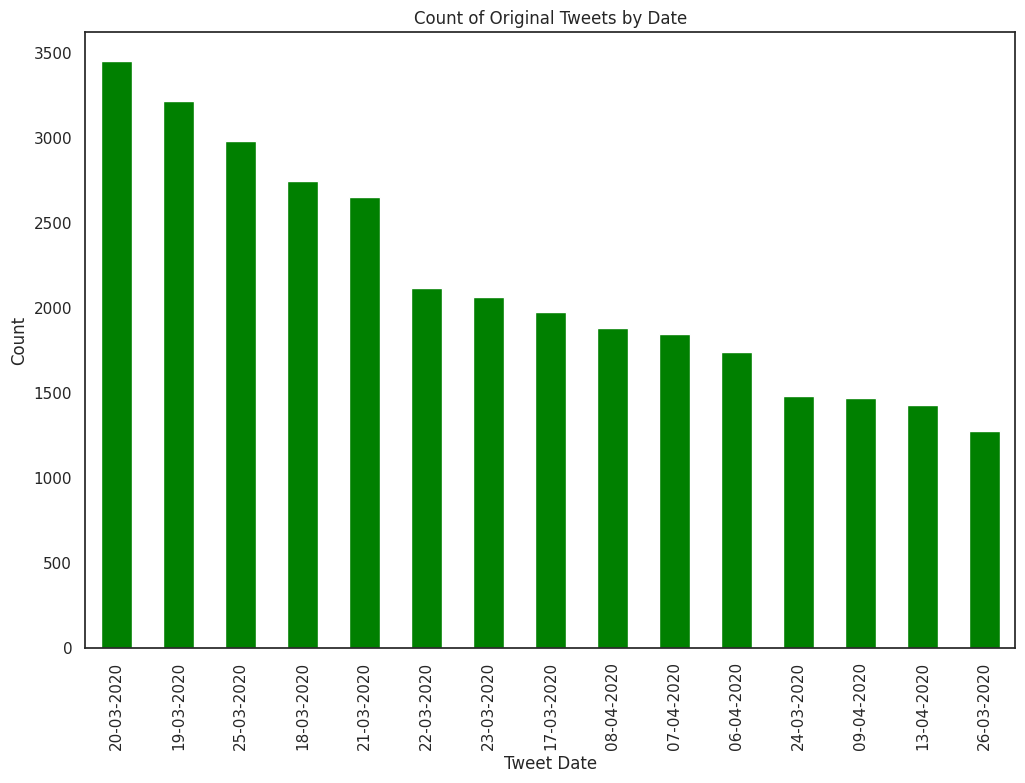

In [33]:
import pandas as pd
import plotly.express as px
# plot the original tweet column as a bar plot
tweet['TweetAt'].value_counts().head(15).plot(kind='bar',color='green')

# set the plot title and axis labels
plt.title('Count of Original Tweets by Date')
plt.xlabel('Tweet Date')
plt.ylabel('Count')

# display the plot
plt.show()

**1. Why did you pick the specific chart?**

**Answer Here.**

The bar plot is a common and widely used chart type for visualizing categorical data, such as dates or categories, with a discrete count or frequency associated with each category.

**2. What is/are the insight(s) found from the chart?**

**Answer Here**

Dated 20 March ,2020 has highest number of tweet i.e 3448.

## ***4. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [34]:
# Handling Missing Values & Missing Value Imputation
tweet.isnull().sum().sort_values(ascending=False)

Location         8590
UserName            0
ScreenName          0
TweetAt             0
OriginalTweet       0
Sentiment           0
text_length         0
dtype: int64

**What all missing value imputation techniques have you used and why did you use those techniques?**

**Answer Here.**

Here we can find that 'Location' column having null values 8590 and we generally not take 'Location' column as  machine learning model as Sentiment analysis.

### 2. Handling Outliers

In [35]:
# Handling Outliers & Outlier treatments
print(tweet[['OriginalTweet', 'Sentiment']].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   OriginalTweet  41157 non-null  object
 1   Sentiment      41157 non-null  object
dtypes: object(2)
memory usage: 643.2+ KB
None


**What all outlier treatment techniques have you used and why did you use those techniques?**

**Answer Here.**

We do not treated/handled  the outliers because we did not take any column having continuous data (numerical data) as Dependent/Independent column during the model training.


# **5. Textual Data Preprocessing**

(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

In [36]:
import nltk
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [37]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [38]:
import regex as re

In [39]:
# Lower Casing
# Remove Punctuations
# Remove URLs & Remove words and digits contain digits
# Remove Stopwords
# Remove White spaces
# Rephrase Text
# Tokenization
# Normalizing Text (i.e., Stemming, Lemmatization etc.)
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
import string

def transform_text(text):
    # Convert text to lowercase
    text = text.lower()
    
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    
    # Tokenize text into words
    words = nltk.word_tokenize(text)
    
    # Remove non-alphanumeric characters
    words = [word for word in words if word.isalnum()]
    
    # Remove stopwords and punctuation
    stopwords_set = set(stopwords.words('english'))
    punctuation_set = set(string.punctuation)
    words = [word for word in words if word not in stopwords_set and word not in punctuation_set]
    
    # Lemmatize words
    lemmatizer = WordNetLemmatizer()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    
    # Join words into a string and return
    return ' '.join(lemmatized_words)

In [40]:
#Text normalization 
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

**Which text normalization technique have you used and why?**

**Answer Here**.

Here we use both Stemming & Lemmatization normalization technique because Stemming  technique of reducing words to their root form and Lemmatization is another technique used for text normalization that reduces words to their base or dictionary form, known as a lemma .Hence ,we used both technique as proper text form and later used for classfication modelling .

In [41]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today https/20.89.")

'gon na home soon want talk stuff anymore tonight k cried enough today'

In [42]:
# Apply the `transform_text()` function to each value in the 'OriginalTweet' column of `tweet`
tweet["Clean_Tweets"] = tweet['OriginalTweet'].apply(transform_text)

In [43]:
 # Access the 'OriginalTweet' value in the row with integer in `tweet`
 tweet.iloc[25160]["OriginalTweet"]

'Crude oil dropped to its lowest in 17 years in Asia as #coronavirus in #US and #EU shows little sign of slowing.\r\r\n\r\r\nNoon prices:\r\r\n#SPX500Â\x962504.3\r\r\n#NAS100Â\x967507.1\r\r\n#WTIÂ\x9620.24\r\r\n#GOLDÂ\x961618.08\r\r\n#SILVERÂ\x9614.118\r\r\n\r\r\nWatch these prices closely: https://t.co/WuiEEfSNOj\r\r\n\r\r\n#COVID19 #CoronaVirusOutbreak https://t.co/j68MZIDXAd https://t.co/9MyqGxutUU'

In [44]:
tweet.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,text_length,Clean_Tweets
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,111,menyrbie chrisitv
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,237,advice talk neighbour family exchange phone nu...
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,131,coronavirus australia woolworth give elderly d...
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive,306,food stock one empty please panic enough food ...
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Negative,310,ready go supermarket covid19 outbreak paranoid...


In [45]:
# Create a new column in `tweet` called 'temp_list'
tweet['temp_list'] = tweet['Clean_Tweets'].apply(lambda x:str(x).split())

In [46]:
tweet['temp_list']

0                                     [menyrbie, chrisitv]
1        [advice, talk, neighbour, family, exchange, ph...
2        [coronavirus, australia, woolworth, give, elde...
3        [food, stock, one, empty, please, panic, enoug...
4        [ready, go, supermarket, covid19, outbreak, pa...
                               ...                        
41152    [airline, pilot, offering, stock, supermarket,...
41153    [response, complaint, provided, citing, relate...
41154    [know, getting, tough, kameronwilds, rationing...
41155    [wrong, smell, hand, sanitizer, starting, turn...
41156    [tartiicat, well, rift, going, amazon, rn, alt...
Name: temp_list, Length: 41157, dtype: object

In [47]:
from collections import Counter
import pandas as pd

# Create a flattened list of all words in the nested list column
word_list = [word for sublist in tweet['temp_list'] for word in sublist]

# Count the frequency of each word and store in a Counter object
word_counts = Counter(word_list)

# Create a dataframe of the top 30 most common words
top_words = pd.DataFrame(word_counts.most_common(30), columns=['Common_words', 'count'])

# Apply a background gradient to the dataframe for better visualization
styled_top_words = top_words.style.background_gradient(cmap='Reds')

In [48]:
top_words

,Common_words,count
0,coronavirus,18045
1,price,8936
2,store,8166
3,supermarket,7737
4,food,7221
5,grocery,6739
6,people,5563
7,amp,5197
8,consumer,5133
9,covid19,4935


In [49]:
# Create a new DataFrame called `neutral` containing only the 'Clean_Tweets' column from `tweet` where the 'Sentiment' column is 'Neutral','positive','negative'.
neutral=pd.DataFrame(tweet[['Clean_Tweets']] [tweet['Sentiment'] == 'Neutral'])
positive=pd.DataFrame(tweet[['Clean_Tweets']] [tweet['Sentiment'] == 'Positive'])
negative=pd.DataFrame(tweet[['Clean_Tweets']] [tweet['Sentiment'] == 'Negative'])

In [50]:
positive

,Clean_Tweets
1,advice talk neighbour family exchange phone nu...
2,coronavirus australia woolworth give elderly d...
3,food stock one empty please panic enough food ...
5,news first confirmed case came sullivan county...
6,cashier grocery store sharing insight prove cr...
...,...
41146,gold price rose high today due coronavirus inc...
41148,uv light sterilizer sanitizer mask mobile phon...
41150,never situation amp world going supermarket pi...
41151,mrsilverscott definitely man feel like fall ne...


In [51]:
negative

,Clean_Tweets
4,ready go supermarket covid19 outbreak paranoid...
9,corona prevention stop buy thing cash use onli...
20,100 nation inficted covid 19 world must play f...
24,10downingstreet grantshapps done ensure food e...
26,preparation higher demand potential food short...
...,...
41133,singaporean politician slammed woman snapped s...
41147,really shitting much home covid19 coronavirus ...
41149,still shocked number toronto supermarket emplo...
41153,response complaint provided citing related del...


In [52]:
neutral

,Clean_Tweets
0,menyrbie chrisitv
7,supermarket today buy toilet paper rebel toile...
10,month crowding supermarket restaurant however ...
16,13
17,eyeonthearctic 16mar20 russia consumer surveil...
...,...
41141,coronavirus narendramodi atcard stayhome lockd...
41143,5gtowers ecuadorunido cruiseships savethechild...
41144,gamzap npr supermarket nearby getting
41152,airline pilot offering stock supermarket shelf...


In [53]:
pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [54]:
# Create an empty list called `spam_corpus`
spam_corpus = []
# Iterate over each row in a DataFrame called `tweet` where the 'Sentiment' column has the value 'Neutral'
for msg in tweet[tweet['Sentiment'] =='Neutral']['Clean_Tweets'].tolist():
  # Split the 'Clean_Tweets' value into individual words using the `split()` method
    for word in msg.split():
       # Append each word to the `spam_corpus` list
        spam_corpus.append(word)

In [55]:
top_words

,Common_words,count
0,coronavirus,18045
1,price,8936
2,store,8166
3,supermarket,7737
4,food,7221
5,grocery,6739
6,people,5563
7,amp,5197
8,consumer,5133
9,covid19,4935


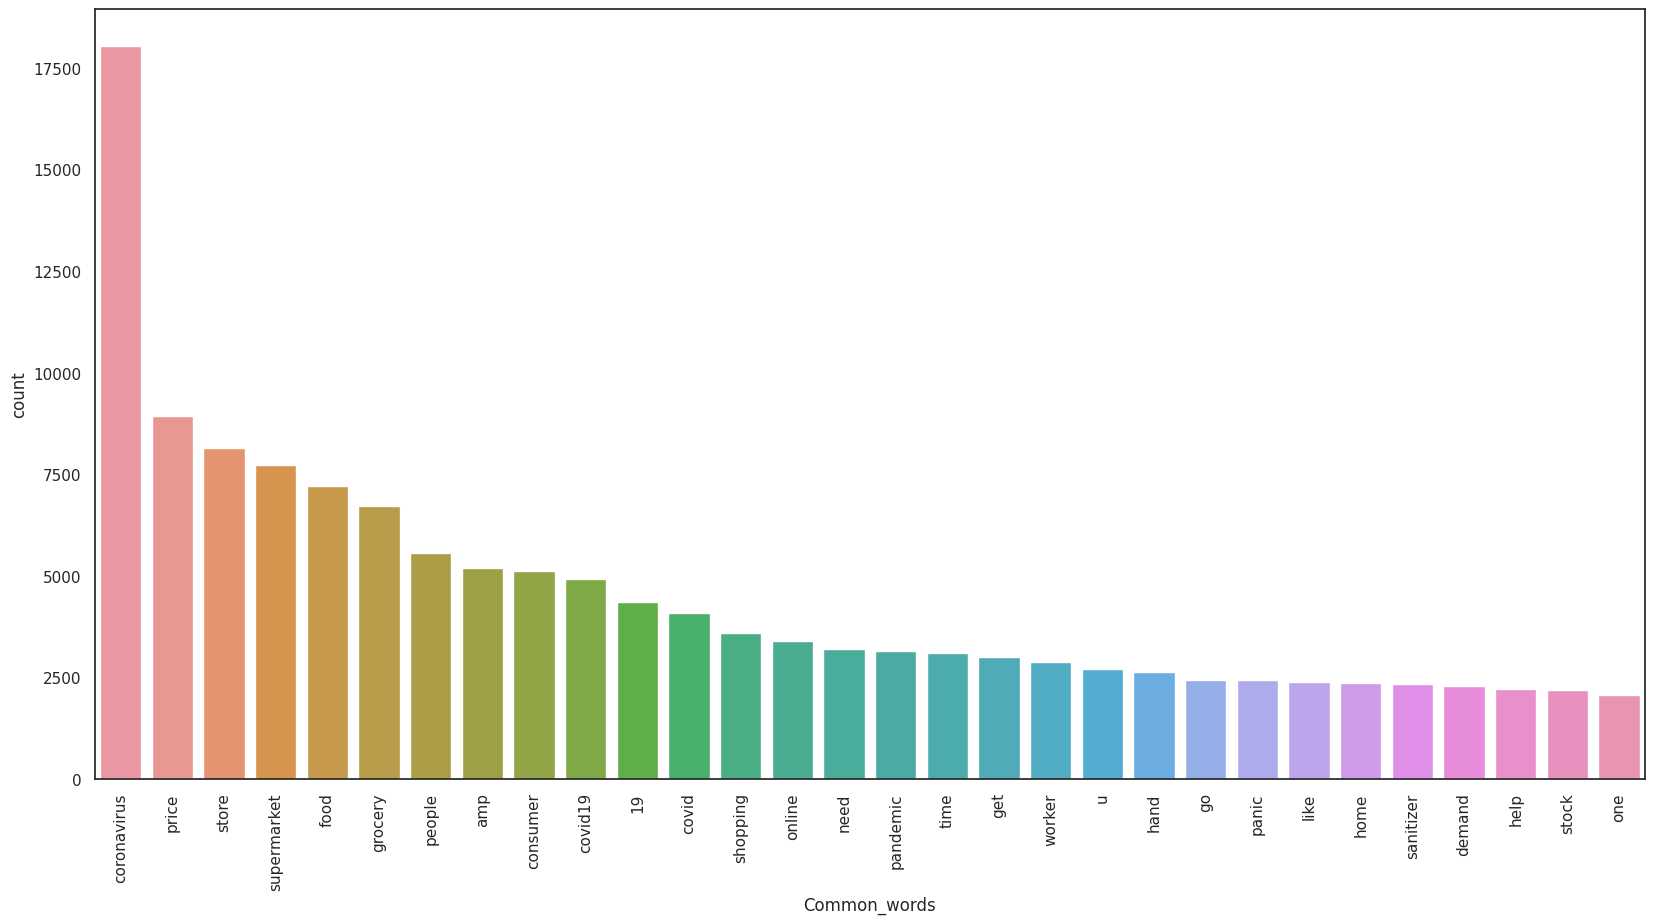

In [56]:
# Import the `Counter` class from the `collections` module
from collections import Counter
plt.figure(figsize=(20,10))
# Import the `seaborn` library for creating data visualizations
sns.barplot(x='Common_words',y='count',data=top_words)
# Set the x-axis labels to be vertical
plt.xticks(rotation='vertical')
# Show the plot
plt.show()

In [57]:
# Import the `WordCloud` class from the `wordcloud` module
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

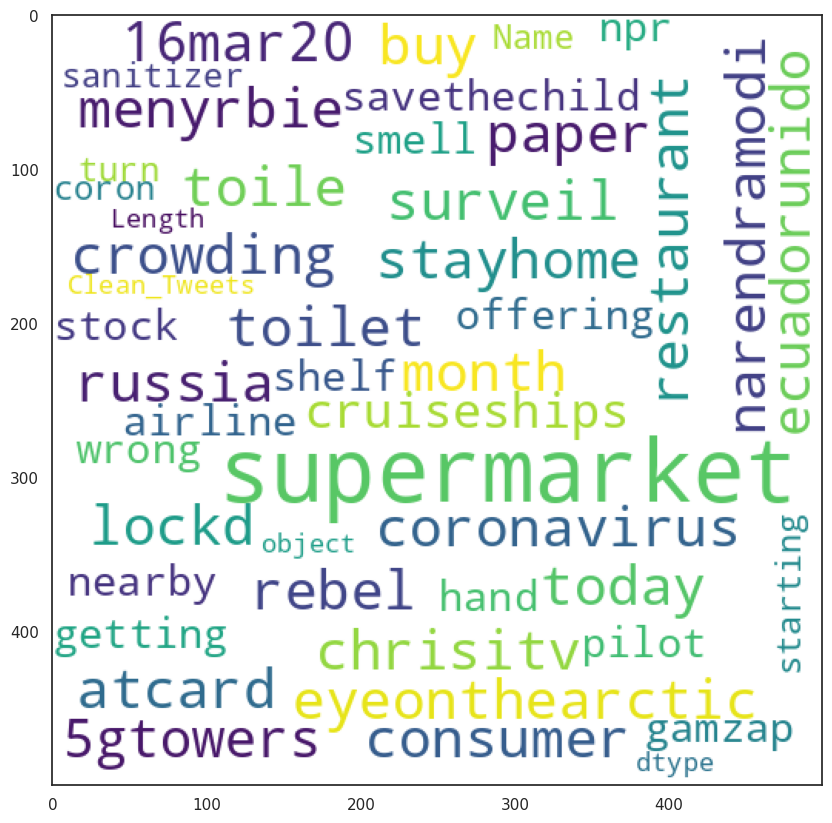

In [58]:
# Generate a word cloud using the `WordCloud` object and the text data from the 'Clean_Tweets' column of a DataFrame called `neutral`
tweet_wc = wc.generate(str(neutral['Clean_Tweets']))
plt.figure(figsize=(10,10))
plt.imshow(tweet_wc)

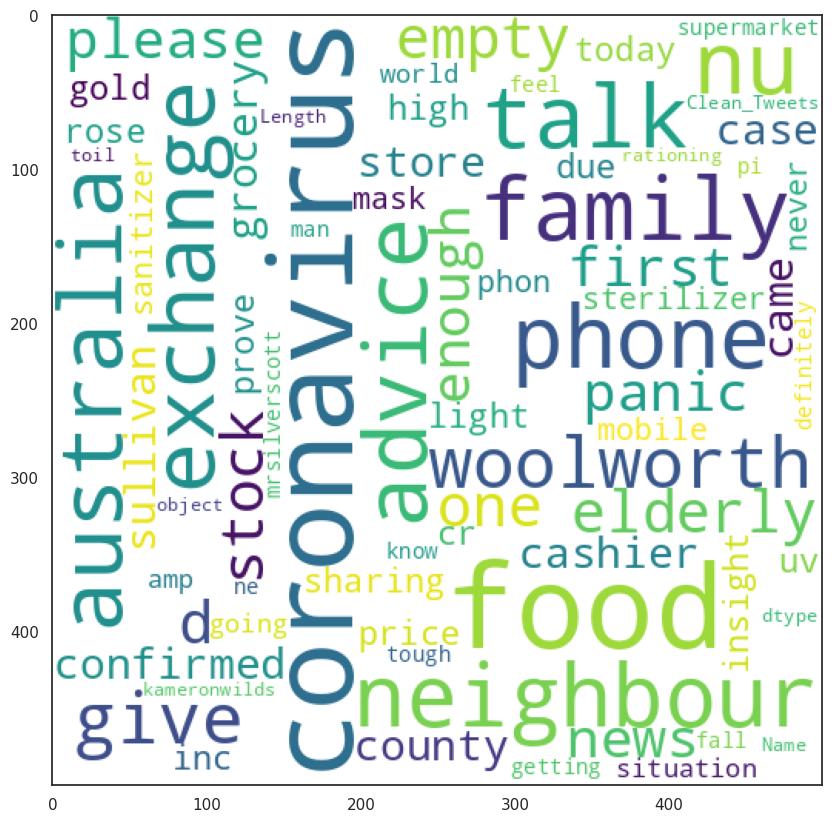

In [59]:
# Generate a word cloud using the `WordCloud` object and the text data from the 'Clean_Tweets' column of a DataFrame called `positive`
tweet_wc = wc.generate(str(positive['Clean_Tweets']))
plt.figure(figsize=(10,10))
plt.imshow(tweet_wc)

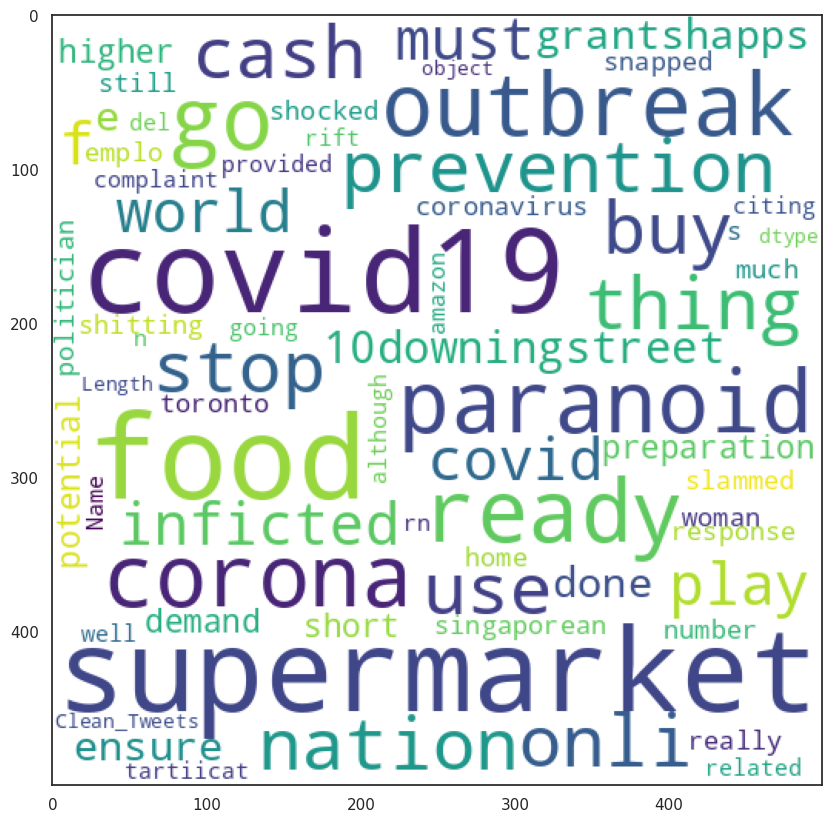

In [60]:
# Generate a word cloud using the `WordCloud` object and the text data from the 'Clean_Tweets' column of a DataFrame called `negative`
tweet_wc = wc.generate(str(negative['Clean_Tweets']))
plt.figure(figsize=(10,10))
plt.imshow(tweet_wc)

##6.**Feature Manipulation & Selection**

### **Data Splitting**

In [61]:
#Assigning dependent and independent features
X= tweet['Clean_Tweets']
y=tweet['Sentiment']

In [62]:
# Applying Train test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify=y,random_state=10)

### **What data splitting ratio have you used and why?**

**Answer Here.**

Data Splitting ratio  is 80% used for Training Data and 20% used for Test Data. By providing more data for training, the model can learn more patterns and trends in the data, which can lead to better predictions on new or unseen data.

In [63]:
#checking shape of splitted data
print(X_train.shape)
y_test.shape

(32925,)


(8232,)

## **7. Data Scaling**

**Which method have you used to scale you data and why?**

**Answer Here.**

Here no need of any scaling of Dataset becuase here only check sentiment of people,hence we analyze only  User sentiment  tweet according to the secenario of Covid-19.

## **Handling Imbalanced Dataset**

In [64]:
tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
 6   text_length    41157 non-null  int64 
 7   Clean_Tweets   41157 non-null  object
 8   temp_list      41157 non-null  object
dtypes: int64(3), object(6)
memory usage: 2.8+ MB


**Do you think the dataset is imbalanced? Explain Why.**

**Answer Here.**

No , here we decided that We used only two column for machine learning modelling i.e 'Original Tweet' & 'Sentiment' and in both column eqaul no of rows 

## **8. ML Model Implementation**

# **Count Vectorization (Bag of words)**

**Vectorizing Text**

In [65]:
# Vectorization
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [66]:
# Bag of words
bw=CountVectorizer(binary=False,max_df=1.0,min_df=5,ngram_range=(1,2))
bw_X_train=bw.fit_transform(X_train.astype(str).str.strip())

In [67]:
# Get the shape of the NumPy array bw_X_train
bw_X_train.shape

(32925, 19136)

In [68]:
# Use the Trained CountVectorizer 'bw' to transform the test data 'X_test' into a bag-of-words representation
# The text data in 'X_test' is first converted to a string representation & then stripped of leading & trailing whitespace characters
bw_X_test=bw.transform(X_test.astype(str).str.strip())

In [69]:
# Get the shape of the NumPy array bw_X_test
bw_X_test.shape

(8232, 19136)

# **MODEL -1 WITH BAGS OF WRODS**

**ML Model - 1**

# **Logistic regression**
Logistic Regression  is a statistical model that  probability of an event taking place by having the the odds against  winning range between 0 and 1 or muticlass classfication for the event be a linear combination of one or more independent variables.

In [70]:
# Initializing the logistic regression model
lr_cv = LogisticRegression()

# Defining a dictionary of hyperparameters to tune over
parameters = {
    'penalty': ['l1', 'l2'],  # Regularization penalty to apply (L1 or L2)
    'C': [100, 10, 1.0, 0.1, 0.01]  # Inverse of regularization strength (lower values indicate stronger regularization)
}

# Creating a GridSearchCV object with cross-validation of 15
logreg_Gcv = GridSearchCV(lr_cv, parameters, cv=15)

# Fitting the training data to the GridSearchCV object to find the best hyperparameters
logreg_Gcv.fit(bw_X_train, y_train)

GridSearchCV(cv=15, estimator=LogisticRegression(),
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'penalty': ['l1', 'l2']})

In [71]:
#predicted values
pred_lr_cv = logreg_Gcv.predict(bw_X_test)

In [72]:
pred_lr_cv 

array(['Negative', 'Positive', 'Positive', ..., 'Neutral', 'Positive',
       'Positive'], dtype=object)

In [73]:
#Accuracy
accuracy_lr_cv = accuracy_score(y_test,pred_lr_cv)
print("Accuracy :",(accuracy_lr_cv))

Accuracy : 0.7876579203109816


In [74]:
# Classification report of Performance metrics
label=['neutral','positive','negative']
print(classification_report(y_test,pred_lr_cv))

              precision    recall  f1-score   support

    Negative       0.79      0.78      0.79      3080
     Neutral       0.69      0.69      0.69      1543
    Positive       0.83      0.83      0.83      3609

    accuracy                           0.79      8232
   macro avg       0.77      0.77      0.77      8232
weighted avg       0.79      0.79      0.79      8232



[Text(0, 0.5, 'Positive'), Text(0, 1.5, 'Negative'), Text(0, 2.5, 'Netural')]

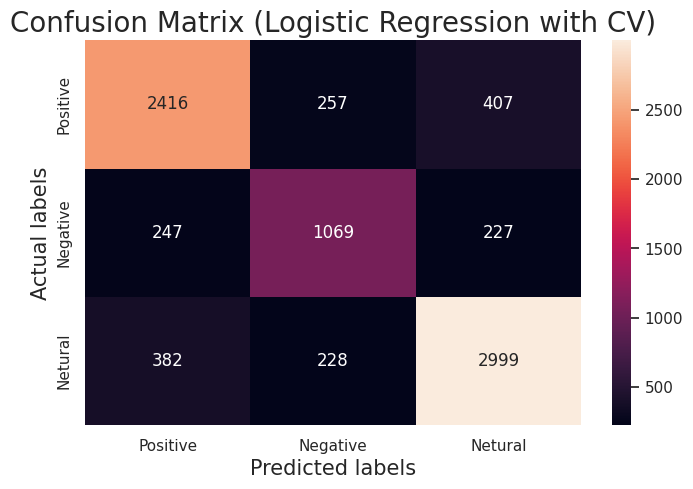

In [75]:
#Plotting Confussion matrix
cf1= (confusion_matrix(y_test,pred_lr_cv))
plt.figure(figsize=(8,5))
ax= plt.subplot()
sns.heatmap(cf1, annot=True, fmt=".0f",ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=15)
ax.set_ylabel('Actual labels', fontsize=15)
ax.set_title('Confusion Matrix (Logistic Regression with CV)', fontsize=20)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

**1.Explain the ML Model used and it's performance using Evaluation metric Score Chart.**

**Answer Here.**

Here the algrothim used Logistic Regression with accuracy of 79% and different Evaluation metric Score with labels 'Negative','Neutral', Positive like precision ,recall, f1 score is also increased.

**2.Which hyperparameter optimization technique have you used and why?**

**Answer Here.**

GridSearchCV is used to tune two hyperparameters for the logistic regression model - the regularization penalty (L1 or L2) and the inverse of regularization strength (C). The performance of the model is evaluated using cross-validation with a cv parameter set to 15.

**3. Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.**

**Answer Here.**

Yes, as seen in above Evaluation metric Score Chart as follows

Accuracy:-79%

precision:-77%

recall:- 77%

f1-score:- 77%


**ML Model - 2**

# **Decision Tree Classifier with CV**

A Decision tree is a flowchart-like structure where each internal node represents a test on an attribute (i.e., a feature),each branch represents the outcome of the test, and each leaf node represents a class label or a numerical value (in the case of regression).

In [76]:
# Initializing model
dt_cv=DecisionTreeClassifier()

#fitting the data to model
dt_cv.fit(bw_X_train,y_train)

#predicted values
pred_dt_cv=dt_cv.predict(bw_X_test)

In [77]:
# Accuracy
cv_score_dt_cv= cross_val_score(dt_cv,bw_X_train,y_train, cv=5)
print("Accuracy: {}" .format(np.mean(cv_score_dt_cv)))

Accuracy: 0.7043280182232345


In [78]:
# Classification report of Performance metrics
label=['Neutral','Positive','Negative']
print(classification_report(y_test,pred_dt_cv))

              precision    recall  f1-score   support

    Negative       0.69      0.68      0.68      3080
     Neutral       0.63      0.68      0.65      1543
    Positive       0.75      0.74      0.74      3609

    accuracy                           0.70      8232
   macro avg       0.69      0.70      0.69      8232
weighted avg       0.71      0.70      0.70      8232



[Text(0, 0.5, 'Positive'), Text(0, 1.5, 'Negative'), Text(0, 2.5, 'Netural')]

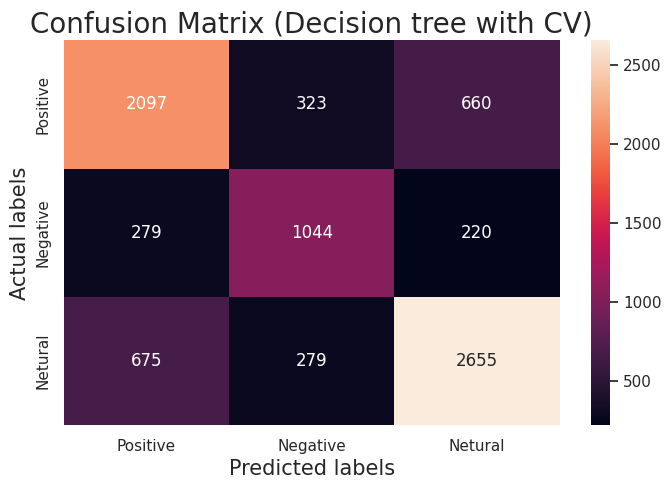

In [79]:
cf2= (confusion_matrix(y_test,pred_dt_cv))
plt.figure(figsize=(8,5))
ax= plt.subplot()
sns.heatmap(cf2, annot=True, fmt=".0f",ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=15)
ax.set_ylabel('Actual labels', fontsize=15)
ax.set_title('Confusion Matrix (Decision tree with CV)', fontsize=20)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

**1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.**

**Answer Here.**

Here the algrothim used Decision Tree with accuracy of 70% and different Evaluation metric Score with labels 'Negative', 'Neutral', Positive like precision ,recall, f1 score is also increased.

**2.Which hyperparameter optimization technique have you used and why?**

**Answer Here.**

Scikit-learn library is used to perform cross-validation on the decision tree model with 5 folds. The np.mean function is then used to calculate the average accuracy score across all folds.

**3. Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart**

**Answer Here**

Yes, as seen in above Evaluation metric Score Chart as follows

Accuracy:-70%

precision:-71%

recall:- 70%

f1-score:- 71%

**ML Model - 3**

# **Navies Bayes**

Naive Bayes is a probabilistic machine learning algorithm used for classification problems. It is based on Bayes' theorem, which describes the probability of a hypothesis (i.e., a class label) given some evidence (i.e., the input features).

In Naive Bayes, the assumption is made that the features are conditionally independent given the class label, which means that the presence or absence of one feature does not affect the probability of another feature.

In [80]:
#Import Library GaussianNB,MultinomialNB,BernoulliNB and score metrics like accuracy ,confusion etc.
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [81]:
# Apply both  type of navies one by one 
mnb = MultinomialNB()
bnb = BernoulliNB()

# **Multinomial Navies Bayes**
Multinomial Naive Bayes: Used for discrete data where the features represent counts or frequencies of occurrences (e.g., text data).

In [82]:
# Fit a Multinomial Naive Bayes classifier 'mnb' to the bag-of-words representation of the training data 'bw_X_train' and the corresponding labels 'y_train'
mnb.fit(bw_X_train,y_train)
# Use the trained classifier to predict the labels for the bag-of-words representation of the test data 'bw_X_test'
y_pred2 = mnb.predict(bw_X_test)
# Compute the accuracy of the predicted labels 'y_pred2' with respect to the true labels 'y_test'
accuracy_mnb = accuracy_score(y_test,y_pred2)
# Print the accuracy of the Multinomial Naive Bayes classifier
print(accuracy_mnb)

0.6836734693877551


In [83]:
label=['Neutral','Positive','Negative']
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

    Negative       0.69      0.72      0.70      3080
     Neutral       0.56      0.52      0.54      1543
    Positive       0.73      0.72      0.73      3609

    accuracy                           0.68      8232
   macro avg       0.66      0.65      0.66      8232
weighted avg       0.68      0.68      0.68      8232



[Text(0, 0.5, 'Positive'), Text(0, 1.5, 'Negative'), Text(0, 2.5, 'Netural')]

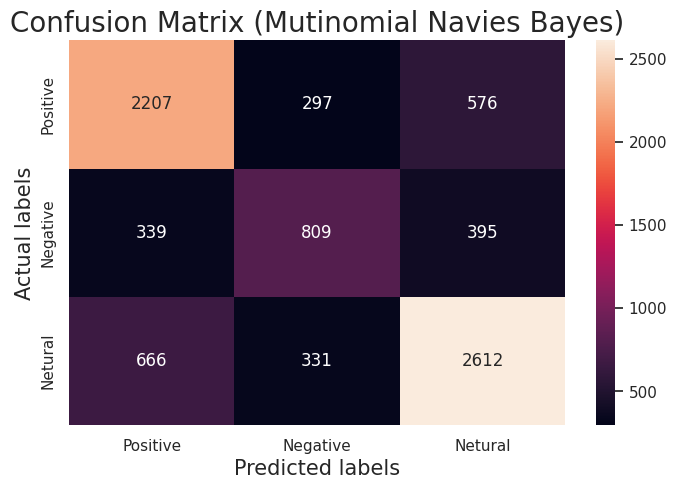

In [84]:
cf3= (confusion_matrix(y_test,y_pred2))
plt.figure(figsize=(8,5))
ax= plt.subplot()
sns.heatmap(cf3, annot=True, fmt=".0f",ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=15)
ax.set_ylabel('Actual labels', fontsize=15)
ax.set_title('Confusion Matrix (Mutinomial Navies Bayes)', fontsize=20)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

**1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.**

**Answer Here.**

In the code provided, the Multinominal Navies Bayes algorithm was used to classify the data, resulting in an accuracy of 68%. Additionally, different evaluation metrics, such as precision, recall, and f1 score, were calculated for each label ('Negative', 'Neutral', 'Positive') and showed improvement compared to the baseline model. 

**2. Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart**

**Answer Here.**

Yes, as seen in above Evaluation metric Score Chart as follows

Accuracy:-68%

Precision:-68%

Recall:- 69%

f1-score:- 68%

## **Bernoulli Navies Bayes**


Bernoulli Naive Bayes: a variant of Multinomial Naive Bayes used for binary or multiclass data where the features represent the presence or absence of a particular attribute (e.g., a word in a document).

In [85]:
#Fit a Multinomial Naive Bayes classifier 'mnb' to the bag-of-words representation
bnb.fit(bw_X_train,y_train)
# Use the trained classifier to predict the labels for the bag-of-words representation of the test data 'bw_X_test'
y_pred3 = bnb.predict(bw_X_test)
# Compute the accuracy of the predicted labels 'y_pred3' with respect to the true labels 'y_test'
accuracy_bnb = accuracy_score(y_test,y_pred3)
# Print the accuracy of the bernoulli Naive Bayes classifier
print(accuracy_bnb)

0.6936345966958212


In [86]:
label=['Neutral','Positive','Negative']
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

    Negative       0.71      0.69      0.70      3080
     Neutral       0.55      0.70      0.62      1543
    Positive       0.76      0.70      0.73      3609

    accuracy                           0.69      8232
   macro avg       0.68      0.69      0.68      8232
weighted avg       0.70      0.69      0.70      8232



[Text(0, 0.5, 'Positive'), Text(0, 1.5, 'Negative'), Text(0, 2.5, 'Netural')]

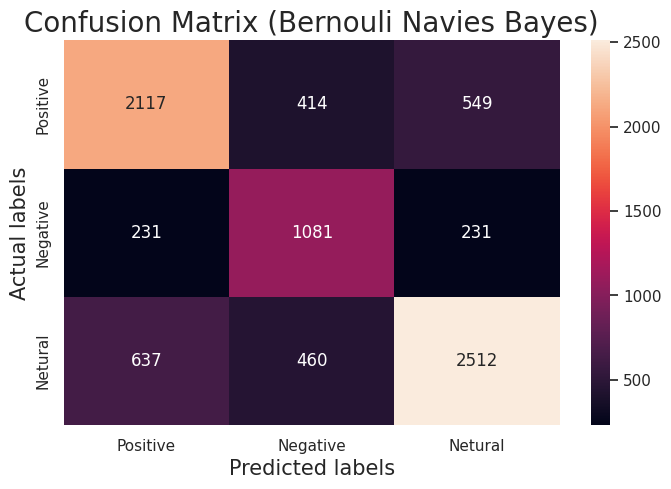

In [87]:
cf4= (confusion_matrix(y_test,y_pred3))
plt.figure(figsize=(8,5))
ax= plt.subplot()
sns.heatmap(cf4, annot=True, fmt=".0f",ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=15)
ax.set_ylabel('Actual labels', fontsize=15)
ax.set_title('Confusion Matrix (Bernouli Navies Bayes)', fontsize=20)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

**1.Explain the ML Model used and it's performance using Evaluation metric Score Chart.**

**Answer Here.**

In the code provided, the Bernouli  Navies Bayes algorithm was used to classify the data, resulting in an accuracy of 69%. Additionally, different evaluation metrics, such as precision, recall, and  f1 score, were calculated for each  label ('Negative', 'Neutral', 'Positive') and showed improvement compared to the baseline model.

**2.Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart**

Answer Here.

Yes, as seen in above Evaluation metric Score Chart as follows

Accuracy:-69%

Precision:-68%

Recall:- 70%

f1-score:- 68%

**ML Model - 4**

# **KNN(K-Nearest Neighbours)**

It is a simple algorithm that works by finding the K closest instances in the training data to a given input instance and then assigning the label of the majority class among those instances as the predicted label for the input instance.

In [88]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Initialize KNN classifier
knn = KNeighborsClassifier()

# Define parameter grid with range of values for n_neighbors
param_grid = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8,9]}

# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5)

# Fit KNN model to training data and perform grid search
grid_search.fit(bw_X_train, y_train)

# Print best hyperparameters and corresponding mean cross-validation score
print('Best hyperparameters:', grid_search.best_params_)
print('Mean cross-validation score:', grid_search.best_score_)

Best hyperparameters: {'n_neighbors': 1}
Mean cross-validation score: 0.38526955201214885


In [89]:
#predicted values
pred_knn_cv = grid_search.predict(bw_X_test)

In [90]:
pred_knn_cv

array(['Neutral', 'Neutral', 'Negative', ..., 'Neutral', 'Negative',
       'Negative'], dtype=object)

In [91]:
# Accuracy
accuracy_KNN = accuracy_score(y_test,pred_knn_cv)
print("Accuracy :",(accuracy_KNN))

Accuracy : 0.39297862001943634


In [92]:
# Classification report of Performance metrics
label=['Neutral','Positive','Negative']
print(classification_report(y_test,pred_knn_cv))

              precision    recall  f1-score   support

    Negative       0.65      0.30      0.41      3080
     Neutral       0.24      0.84      0.38      1543
    Positive       0.70      0.28      0.40      3609

    accuracy                           0.39      8232
   macro avg       0.53      0.47      0.40      8232
weighted avg       0.59      0.39      0.40      8232



[Text(0, 0.5, 'Positive'), Text(0, 1.5, 'Negative'), Text(0, 2.5, 'Netural')]

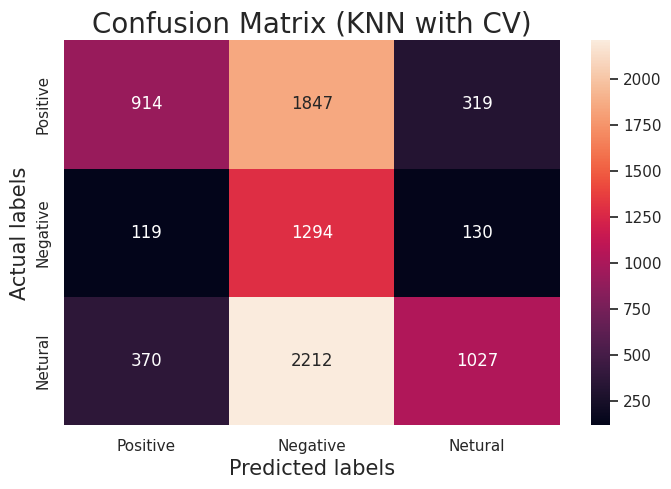

In [93]:
cf_knn= (confusion_matrix(y_test,pred_knn_cv))
plt.figure(figsize=(8,5))
ax= plt.subplot()
sns.heatmap(cf_knn, annot=True, fmt=".0f",ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=15)
ax.set_ylabel('Actual labels', fontsize=15)
ax.set_title('Confusion Matrix (KNN with CV)', fontsize=20)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

**1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.**

**Answer Here.**

KNN algorithm was used to classify the data, resulting in an accuracy of 39%. Additionally, different evaluation metrics, such as precision, recall, and f1 score, were calculated for each label ('Negative', 'Neutral', 'Positive') and showed not improved compared to the baseline model.

**2.Which hyperparameter optimization technique have you used and why?**

**Answer Here.**

The range of possible values for n_neighbors is defined in the param_grid dictionary, which contains a list of integers from 1 to 9. GridSearchCV is then used to evaluate the performance of the KNN algorithm with each value of n_neighbors, using 5-fold cross-validation.

**3. Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart**

**Answer Here.**

Yes, as seen in above Evaluation metric Score Chart as follows

Accuracy:-

Precision:-

Recall:-

f1-score:- 

**ML Model - 5**

# **Support Vector Machine**
It is a supervised learning algorithm that works by finding the hyperplane that best separates the classes in the input data.

In multi-class classification problems, multiple hyperplanes are used to separate the classes. The optimal hyperplane is the one that maximizes the margin, which is the distance between the hyperplane and the closest points from each class, known as support vectors.

In [94]:
# Initializing model
svm_cv = SVC()

#fitting the data to model
svm_cv.fit(bw_X_train,y_train)

#prediction
pred_svm_cv = svm_cv.predict(bw_X_test)

In [95]:
pred_svm_cv

array(['Negative', 'Positive', 'Positive', ..., 'Neutral', 'Positive',
       'Neutral'], dtype=object)

In [96]:
# Accuracy
accuracy_svc = accuracy_score(y_test,pred_svm_cv)
print("Accuracy :",(accuracy_svc))

Accuracy : 0.7683430515063168


In [97]:
# Classification report of Performance metrics
label=['Neutral','Positive','Negative']
print(classification_report(y_test,pred_svm_cv))

              precision    recall  f1-score   support

    Negative       0.79      0.75      0.77      3080
     Neutral       0.67      0.68      0.67      1543
    Positive       0.80      0.82      0.81      3609

    accuracy                           0.77      8232
   macro avg       0.75      0.75      0.75      8232
weighted avg       0.77      0.77      0.77      8232



[Text(0, 0.5, 'Positive'), Text(0, 1.5, 'Negative'), Text(0, 2.5, 'Netural')]

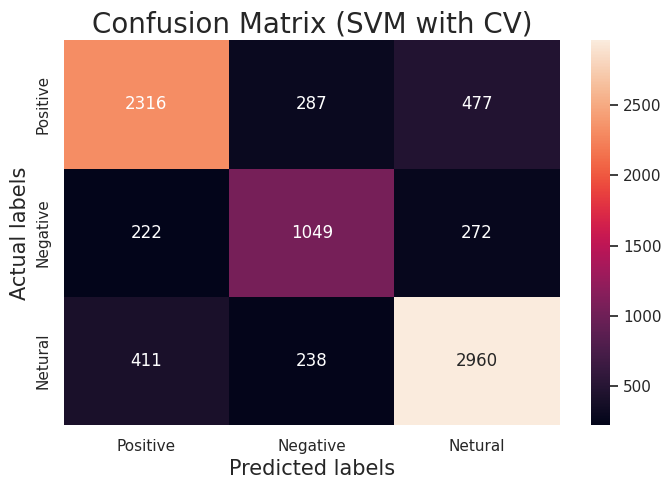

In [98]:
cf6= (confusion_matrix(y_test,pred_svm_cv))
plt.figure(figsize=(8,5))
ax= plt.subplot()
sns.heatmap(cf6, annot=True, fmt=".0f",ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=15)
ax.set_ylabel('Actual labels', fontsize=15)
ax.set_title('Confusion Matrix (SVM with CV)', fontsize=20)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

**1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.**

**Answer Here.**

Support Vector Machine algorithm was used to classify the data, resulting in an accuracy of 76%. Additionally, different evaluation metrics, such as precision, recall, and f1 score, were calculated for each label ('Negative', 'Neutral', 'Positive') and showed   improved compared to the baseline model.

**2. Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart**

**Answer Here.**
Yes, as seen in above Evaluation metric Score Chart as follows

Accuracy:-75%

Precision:-77%

Recall:- 77%

f1-score:-77%

**ML Model - 6**

# **Random Forest**
Random Forest works by constructing multiple decision trees on randomly sampled subsets of the training data. Each tree is trained on a different subset of the features and the data, which helps to reduce overfitting and improve the generalization performance. 

During prediction, the input instance is passed through each decision tree, and the majority vote among the predictions of the individual trees is taken as the final prediction.

In [99]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
rf_clf =RandomForestClassifier(n_estimators=100, random_state=42)

# Fit classifier to training data
rf_clf.fit(bw_X_train, y_train)

# Predict labels for test data
y_pred_rf = rf_clf.predict(bw_X_test)

# Calculate accuracy of classifier on test data
accuracy_rf = (y_pred_rf == y_test).mean()
print('Accuracy_rf:', accuracy_rf)

Accuracy_rf: 0.7608114674441205


In [100]:
# Classification report of Performance metrics
label=['Neutral','Positive','Negative']
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

    Negative       0.78      0.72      0.75      3080
     Neutral       0.68      0.72      0.70      1543
    Positive       0.78      0.81      0.80      3609

    accuracy                           0.76      8232
   macro avg       0.75      0.75      0.75      8232
weighted avg       0.76      0.76      0.76      8232



[Text(0, 0.5, 'Positive'), Text(0, 1.5, 'Negative'), Text(0, 2.5, 'Netural')]

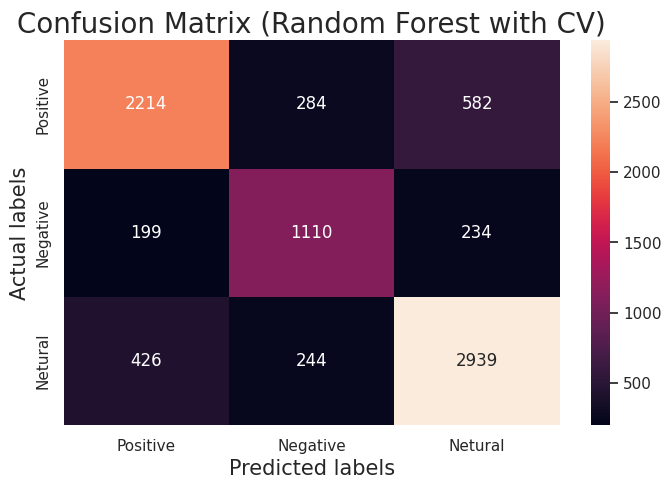

In [101]:
cf7= (confusion_matrix(y_test,y_pred_rf))
plt.figure(figsize=(8,5))
ax= plt.subplot()
sns.heatmap(cf7, annot=True, fmt=".0f",ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=15)
ax.set_ylabel('Actual labels', fontsize=15)
ax.set_title('Confusion Matrix (Random Forest with CV)', fontsize=20)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

**1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.**

**Answer Here.**

Random Forest  algorithm was used to classify the data, resulting in an accuracy of 76%. Additionally, different evaluation metrics, such as precision, recall, and f1 score, were calculated for each label ('Negative', 'Neutral', 'Positive') and not slightly  improved compared to the baseline model.

**2.Which hyperparameter optimization technique have you used and why?**

**Answer Here.**

Hyperparameter optimization technique has been used for the Random Forest Classifier. The classifier has been instantiated with the hyperparameter values n_estimators=100 and random_state=42, which are default values in the absence of explicit hyperparameter tuning.

**3. Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart**

**Answer Here.**

No, as seen in above Evaluation metric Score Chart as follows

Accuracy:-76%

Precision:-75%

Recall:- 75%

f1-score:-75%

**ML Model - 7**

# **Stochastic Gradient Descent**
In SGD, instead of computing the gradient over the entire training set, the gradient is computed on a randomly selected subset (or mini-batch) of the training data. This reduces the computational cost of the algorithm and enables faster convergence.

The model parameters are updated after each mini-batch, and the process is repeated until convergence or a maximum number of iterations is reached.

SGD can work well for large datasets and high-dimensional data, as it can efficiently handle large amounts of data and converge faster than traditional Gradient Descent

In [102]:
from sklearn.linear_model import SGDClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
# Initialize SGDClassifier object with desired hyperparameters
sgd_clf = SGDClassifier(loss='hinge', penalty='l2', alpha=0.0001, random_state=42, max_iter=1000)

# Train the model on the training data
sgd_clf.fit(bw_X_train, y_train)

# Predict labels for test data
y_pred_sgd = sgd_clf.predict(bw_X_test)

# Calculate accuracy of classifier on test data
accuracy_sgd= accuracy_score(y_test, y_pred_sgd)
print('Accuracy_sgd:', accuracy_sgd)

Accuracy_sgd: 0.7995626822157434


In [103]:
# Classification report of Performance metrics
label=['Neutral','Positive','Negative']
print(classification_report(y_test,y_pred_sgd))

              precision    recall  f1-score   support

    Negative       0.80      0.80      0.80      3080
     Neutral       0.70      0.71      0.71      1543
    Positive       0.84      0.83      0.84      3609

    accuracy                           0.80      8232
   macro avg       0.78      0.78      0.78      8232
weighted avg       0.80      0.80      0.80      8232



[Text(0, 0.5, 'Positive'), Text(0, 1.5, 'Negative'), Text(0, 2.5, 'Netural')]

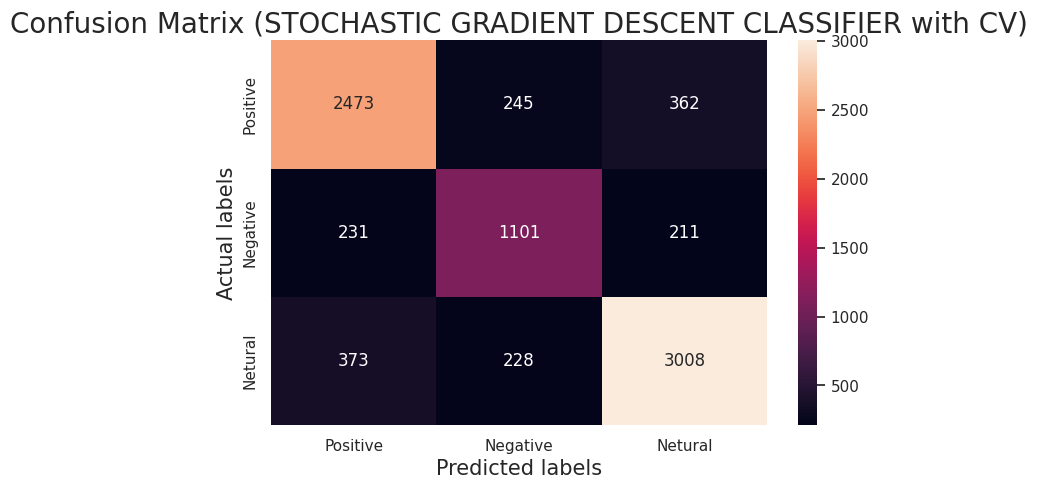

In [104]:
cf8= (confusion_matrix(y_test,y_pred_sgd))
plt.figure(figsize=(8,5))
ax= plt.subplot()
sns.heatmap(cf8, annot=True, fmt=".0f",ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=15)
ax.set_ylabel('Actual labels', fontsize=15)
ax.set_title('Confusion Matrix (STOCHASTIC GRADIENT DESCENT CLASSIFIER with CV)', fontsize=20)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

**1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.**

**Answer Here.**

Stochastic Gradient Descent algorithm was used to classify the data, resulting in an accuracy of 80%. Additionally, different evaluation metrics, such as precision, recall, and f1 score, were calculated for each label ('Negative', 'Neutral', 'Positive') and much  improved compared to the all the baseline model.

**2.Which hyperparameter optimization technique have you used and why?**

**Answer Here.**

The classifier has been instantiated with the hyperparameter values loss='hinge', penalty='l2', alpha=0.0001, random_state=42, and max_iter=1000, which are default values in the absence of explicit hyperparameter tuning.

**3. Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart**

**Answer Here.**

Yes, as seen in above Evaluation metric Score Chart as follows and here accuracy is much better as compared to all the baseline model algorthim.This Stochastic Gradient Descent algorthim used for model deployement as Sentiment Analysis using Vectorization techinque Count Vectorizer(Bags of Word).

Accuracy:-80%

Precision:-81%

Recall:- 80%

f1-score:-80%

### **TF-IDF VECTORIZATION(Term Frequency-Inverse Document Frequency**)

TF-IDF is calculated as the product of two values: term frequency (TF) and Inverse document frequency (IDF).

The term frequency (TF) measures how frequently a term appears in a document. 

The inverse document frequency (IDF) measures how important a term is in the entire corpus, by penalizing the terms that appear in many documents.

**Data Splitting**

In [105]:
X=tweet['Clean_Tweets']
y=tweet['Sentiment']

In [106]:
# Applying Train test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify=y,random_state=10)

In [107]:
print(X_train.shape)
y_test.shape

(32925,)


(8232,)

## **Vectorizing Text**

In [108]:
# Vectorization
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [109]:
# TF-IDF
tv=TfidfVectorizer(use_idf=True,max_df=1.0,min_df=5,ngram_range=(1,2),sublinear_tf=True)
tv_X_train=tv.fit_transform(X_train.astype(str).str.strip())

In [110]:
tv_X_train.shape

(32925, 19136)

In [111]:
tv_X_test=tv.transform(X_test.astype(str).str.strip())

**MODEL - 1 (TF-IDF)**

# **Logistic Regression**

In [112]:
# Initializing model
lr_tv=LogisticRegression()
parameters = dict(penalty=['l1', 'l2'],C=[100, 10, 1.0, 0.1, 0.01])

#Hyperparameter tuning by GridserchCV
lr_tv_Gcv=GridSearchCV(lr_tv,parameters,cv=5)

#fitting the data to model
lr_tv_Gcv.fit(tv_X_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'penalty': ['l1', 'l2']})

In [113]:
#predicted values
pred_lr_tv_Gcv = lr_tv_Gcv.predict(tv_X_test)

In [114]:
#Accuracy
accuracy_lr_Gcv = accuracy_score(y_test,pred_lr_tv_Gcv)
print("Accuracy :",(accuracy_lr_Gcv))

Accuracy : 0.783284742468416


In [115]:
# Classification report of Performance metrics
label=['Neutral','Positive','Negative']
print(classification_report(y_test,pred_lr_tv_Gcv))

              precision    recall  f1-score   support

    Negative       0.78      0.79      0.79      3080
     Neutral       0.69      0.64      0.66      1543
    Positive       0.82      0.83      0.83      3609

    accuracy                           0.78      8232
   macro avg       0.76      0.76      0.76      8232
weighted avg       0.78      0.78      0.78      8232



[Text(0, 0.5, 'Positive'), Text(0, 1.5, 'Negative'), Text(0, 2.5, 'Netural')]

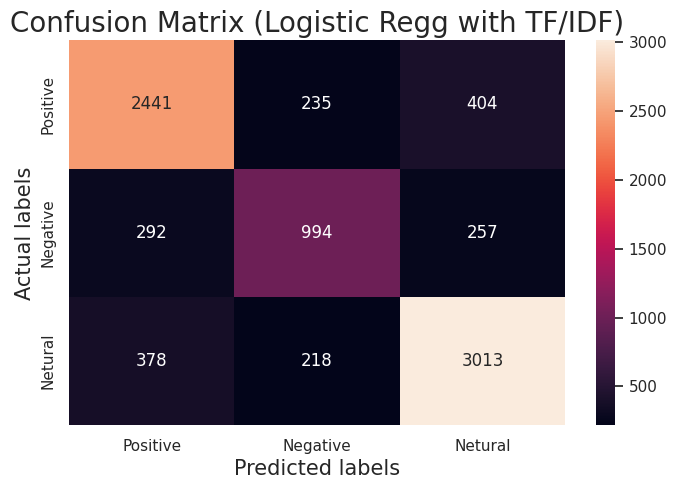

In [116]:
cf1a= (confusion_matrix(y_test,pred_lr_tv_Gcv))
plt.figure(figsize=(8,5))
ax= plt.subplot()
sns.heatmap(cf1a, annot=True, fmt=".0f",ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=15)
ax.set_ylabel('Actual labels', fontsize=15)
ax.set_title('Confusion Matrix (Logistic Regg with TF/IDF)', fontsize=20)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

**1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.**

**Answer Here.**

Logistic Regression algorithm was used to classify the data, resulting in an accuracy of 78%. Additionally, different evaluation metrics, such as precision, recall, and f1 score, were calculated for each label ('Negative', 'Neutral', 'Positive') and much improved compared to the all the baseline model.

**2.Which hyperparameter optimization technique have you used and why?**

**Answer Here.**

The hyperparameter space is defined by the "parameters" dictionary, which specifies the values of the regularization parameter C and the penalty term (l1 or l2). GridSearchCV also helps to prevent overfitting and ensures that the model generalizes well to unseen data.

**3. Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart**

**Answer Here.**

Yes, as seen in above Evaluation metric Score Chart as follows and here accuracy is much better as compared to all the baseline model algorthim.This Logistic Regression algorthim used for model deployement as Sentiment Analysis using Vectorization techinque TF-IDF( Term Frequency -Inverse Document Frequency).

Accuracy:-78%

Precision:-79%

Recall:- 79%

f1-score:-79%

**MODEL - 2 (TF-IDF)**

# **Decision Tree**

In [117]:
# Initializing model
dt_tv=DecisionTreeClassifier()

#fitting the data to model
dt_tv.fit(tv_X_train,y_train)

#prediction
pred_dt_tv=dt_tv.predict(tv_X_test)

In [118]:
pred_dt_tv

array(['Neutral', 'Negative', 'Positive', ..., 'Neutral', 'Positive',
       'Neutral'], dtype=object)

In [119]:
# Accuracy
cv_score_dt_tv= cross_val_score(dt_tv,tv_X_train,y_train, cv=5)
print("Accuracy: {}" .format(np.mean(cv_score_dt_tv)))

Accuracy: 0.6250873196659075


In [120]:
# Classification report of Performance metrics
label=['Neutral','Positive','Negative']
print(classification_report(y_test,pred_dt_tv))

              precision    recall  f1-score   support

    Negative       0.61      0.61      0.61      3080
     Neutral       0.49      0.54      0.51      1543
    Positive       0.68      0.65      0.67      3609

    accuracy                           0.62      8232
   macro avg       0.59      0.60      0.60      8232
weighted avg       0.62      0.62      0.62      8232



[Text(0, 0.5, 'Positive'), Text(0, 1.5, 'Negative'), Text(0, 2.5, 'Netural')]

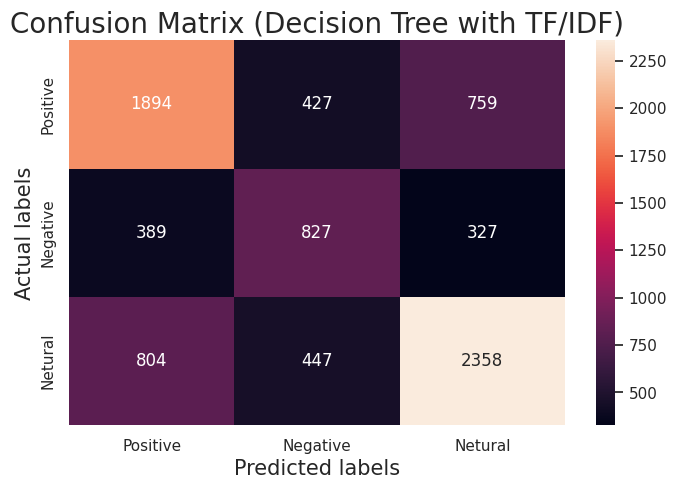

In [121]:
#Plotting Confussion matrix
cf2a= (confusion_matrix(y_test,pred_dt_tv))
plt.figure(figsize=(8,5))
ax= plt.subplot()
sns.heatmap(cf2a, annot=True, fmt=".0f",ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=15)
ax.set_ylabel('Actual labels', fontsize=15)
ax.set_title('Confusion Matrix (Decision Tree with TF/IDF)', fontsize=20)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

**1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.**

**Answer Here.**

Decision Tree algorithm was used to classify the data, resulting in an accuracy of 62%. Additionally, different evaluation metrics, such as precision, recall, and f1 score, were calculated for each label ('Negative', 'Neutral', 'Positive') and much improved compared to the all the baseline model.

**2. Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart**

**Answer Here.**

No, as seen in above Evaluation metric Score Chart as follows and here accuracy is  not much better as compared to all the baseline model algorthim as technique TF-IDF( Term Frequency -Inverse Document Frequency).

Accuracy:-62%

Precision:-60%

Recall:- 60%

f1-score:-60%

**MODEL - 3 (TF-IDF)**

# **Navies Bayes**

In [122]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [123]:
mnb = MultinomialNB()
bnb = BernoulliNB()

**Multinomial Navies Bayes**

In [124]:
mnb.fit(tv_X_train,y_train)
y_pred2_mnb_tv = mnb.predict(tv_X_test)
accuracy_mnb_tv = accuracy_score(y_test,y_pred3)
print(accuracy_score(y_test,y_pred2_mnb_tv))

0.6607142857142857


In [125]:
label=['Neutral','Positive','Negative']
print(classification_report(y_test,y_pred2_mnb_tv))

              precision    recall  f1-score   support

    Negative       0.69      0.71      0.70      3080
     Neutral       0.78      0.13      0.23      1543
    Positive       0.64      0.84      0.72      3609

    accuracy                           0.66      8232
   macro avg       0.70      0.56      0.55      8232
weighted avg       0.68      0.66      0.62      8232



[Text(0, 0.5, 'Positive'), Text(0, 1.5, 'Negative'), Text(0, 2.5, 'Netural')]

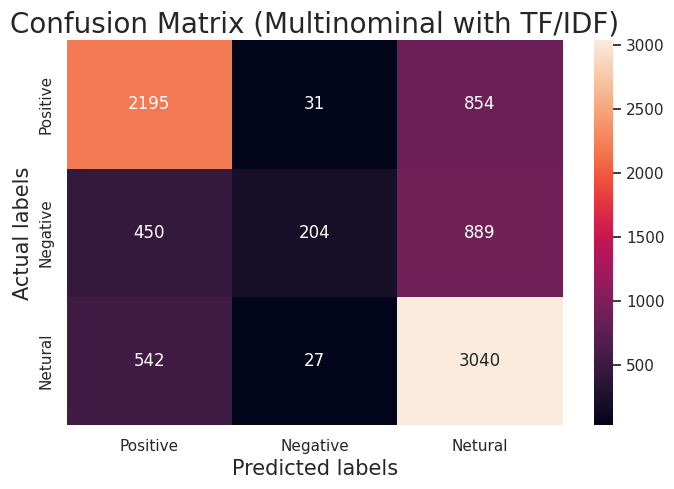

In [126]:
cf3a= (confusion_matrix(y_test,y_pred2_mnb_tv))
plt.figure(figsize=(8,5))
ax= plt.subplot()
sns.heatmap(cf3a, annot=True, fmt=".0f",ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=15)
ax.set_ylabel('Actual labels', fontsize=15)
ax.set_title('Confusion Matrix (Multinominal with TF/IDF)', fontsize=20)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

**1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.**

**Answer Here.**

Multinomial Navies Bayes was used to classify the data, resulting in an accuracy of 65%. Additionally, different evaluation metrics, such as precision, recall, and f1 score, were calculated for each label ('Negative', 'Neutral', 'Positive') and much improved compared to the all the baseline model.

**2. Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart**

**Answer Here.**

Yes, as seen in above Evaluation metric Score Chart as follows and here accuracy is  much better as compared to all the baseline model algorthim as technique TF-IDF( Term Frequency -Inverse Document Frequency).

Accuracy:-65%

Precision:-68%

Recall:- 66%

f1-score:-62%

**Bernoulli Navies Bayes**

In [127]:
bnb.fit(tv_X_train,y_train)
y_pred3_bnb_tv = bnb.predict(tv_X_test)
accuracy_bnb_tv = accuracy_score(y_test,y_pred3)
print(accuracy_score(y_test,y_pred3_bnb_tv))

0.6936345966958212


In [128]:
label=['Neutral','Positive','Negative']
print(classification_report(y_test,y_pred3_bnb_tv))

              precision    recall  f1-score   support

    Negative       0.71      0.69      0.70      3080
     Neutral       0.55      0.70      0.62      1543
    Positive       0.76      0.70      0.73      3609

    accuracy                           0.69      8232
   macro avg       0.68      0.69      0.68      8232
weighted avg       0.70      0.69      0.70      8232



[Text(0.5, 0, 'Positive'), Text(1.5, 0, 'Negative'), Text(2.5, 0, 'Netural')]

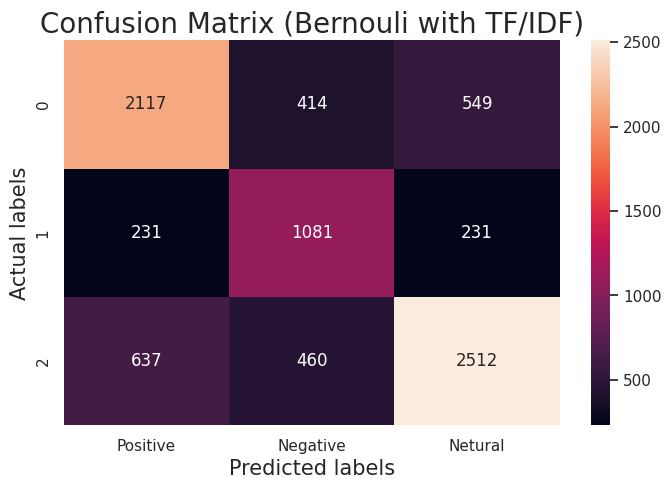

In [129]:
cf4a= (confusion_matrix(y_test,y_pred3_bnb_tv))
plt.figure(figsize=(8,5))
ax= plt.subplot()
sns.heatmap(cf4a, annot=True, fmt=".0f",ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=15)
ax.set_ylabel('Actual labels', fontsize=15)
ax.set_title('Confusion Matrix (Bernouli with TF/IDF)', fontsize=20)
ax.xaxis.set_ticklabels(labels)

**1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.**

**Answer Here.**

Bernoulli Navies Bayes was used to classify the data, resulting in an accuracy of 69%. Additionally, different evaluation metrics, such as precision, recall, and f1 score, were calculated for each label ('Negative', 'Neutral', 'Positive') and much improved compared to the all the baseline model.

**2. Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart**

**Answer Here.**

Yes, as seen in above Evaluation metric Score Chart as follows and here accuracy is much better as compared to all the baseline model algorthim as technique TF-IDF( Term Frequency -Inverse Document Frequency).

Accuracy:-69%

Precision:-68%

Recall:- 70%

f1-score:-68%

**MODEL - 4 (TF-IDF)**

# **KNN(K-Nearest Neighbours)**

In [ ]:
# Initializing model
knn = KNeighborsClassifier()
param = {'n_neighbors': [1,2,3,4,5,6,7,8]}
knn_tv = GridSearchCV(estimator=knn,param_grid=param)

#fitting the data to model
knn_tv.fit(tv_X_train, y_train)